In [23]:
# Dependencies
import pandas as pd
from pathlib import Path
from dash import Dash, html, dash_table, dcc, Input, Output
import plotly.express as px

In [24]:
# Upload data
df = "Clean_Australian_Shark_Attacks.csv"
df

clean_df = pd.read_csv(df, encoding = "CP1252")
clean_df

,Unnamed: 0,Incident.year,Victim.injury,State,Latitude,Longitude,Shark.common.name,Shark.scientific.name,Provoked/unprovoked,Site.category,Incident.month
0,0,1791,fatal,NSW,-33.86666667,151.2,white shark,Carcharodon carchariasÂ,unprovoked,coastal,1
1,1,1803,injured,WA,-25.83333333,113.8833333,tiger shark,Galeocerdo cuvierÂ,unprovoked,coastal,3
2,2,1807,injured,NSW,-33.86666667,151.2,bull shark,Carcharhinus leucas,unprovoked,estuary/harbour,1
3,3,1820,fatal,TAS,-42.8,147.5333333,unknown,unknown,provoked,coastal,1
4,4,1825,injured,NSW,-33.85,151.2166667,bull shark,Carcharhinus leucas,unprovoked,estuary/harbour,1
...,...,...,...,...,...,...,...,...,...,...,...
1223,1223,2023,injured,QLD,-14.06549,144.26335,unknown,unknown,provoked,coastal,11
1224,1224,2023,injured,WA,-30.81556,115.19234,bronze whaler shark,Carcharhinus brachyurus,unprovoked,island open ocean,12
1225,1225,2023,injured,NSW,-31.9694,152.5863946,unknown,unknown,unprovoked,coastal,12
1226,1226,2023,fatal,SA,-34.679356,137.684906.,white shark,Carcharodon carcharias,unprovoked,coastal,12


In [25]:
# Checking the number of records.
total_records = len(clean_df['Unnamed: 0'].unique())
total_records

1228

In [26]:
# select my chosen columns focusing on shark types based on state
reduced_df = clean_df.loc[:, ["Incident.year", "Provoked/unprovoked", "Victim.injury", "Shark.common.name" ]]
reduced_df

,Incident.year,Provoked/unprovoked,Victim.injury,Shark.common.name
0,1791,unprovoked,fatal,white shark
1,1803,unprovoked,injured,tiger shark
2,1807,unprovoked,injured,bull shark
3,1820,provoked,fatal,unknown
4,1825,unprovoked,injured,bull shark
...,...,...,...,...
1223,2023,provoked,injured,unknown
1224,2023,unprovoked,injured,bronze whaler shark
1225,2023,unprovoked,injured,unknown
1226,2023,unprovoked,fatal,white shark


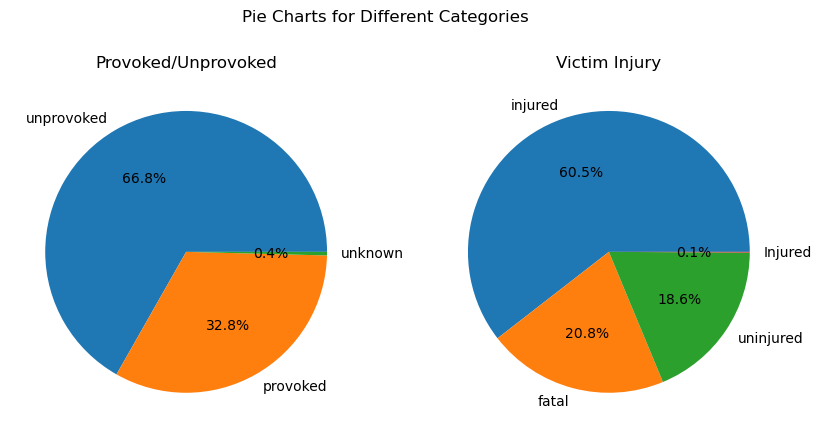

In [27]:
import matplotlib.pyplot as plt

# Count occurrences of each category
provoked_counts = reduced_df['Provoked/unprovoked'].value_counts()
victim_injury_counts = reduced_df['Victim.injury'].value_counts()

# Plotting pie charts for Provoked/Unprovoked and Victim Injury
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Pie Charts for Different Categories')

# Provoked/Unprovoked
axes[0].pie(provoked_counts, labels=provoked_counts.index, autopct='%1.1f%%')
axes[0].set_title('Provoked/Unprovoked')

# Victim Injury
axes[1].pie(victim_injury_counts, labels=victim_injury_counts.index, autopct='%1.1f%%')
axes[1].set_title('Victim Injury')

plt.show()

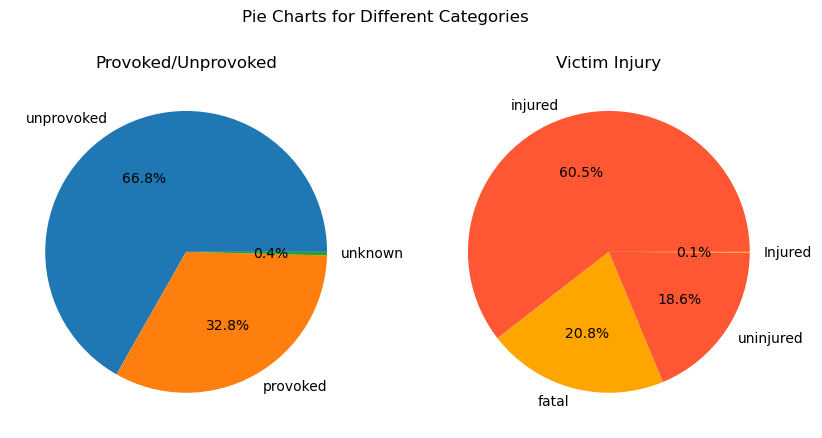

In [28]:
import matplotlib.pyplot as plt

# Count occurrences of each category
provoked_counts = reduced_df['Provoked/unprovoked'].value_counts()
victim_injury_counts = reduced_df['Victim.injury'].value_counts()

# Define colors
colors = ['#FF5733', '#FFA500']  # Red for Fatal, Orange for Injured

# Plotting pie charts for Provoked/Unprovoked and Victim Injury
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Pie Charts for Different Categories')

# Provoked/Unprovoked
axes[0].pie(provoked_counts, labels=provoked_counts.index, autopct='%1.1f%%')
axes[0].set_title('Provoked/Unprovoked')

# Victim Injury
axes[1].pie(victim_injury_counts, labels=victim_injury_counts.index, autopct='%1.1f%%', colors=colors)
axes[1].set_title('Victim Injury')

plt.show()
# This will ensure that the "Fatal" section of the Victim Injury pie chart is displayed in red and the "Injured